# Estudos iniciais sobre o problema _Forest Cover Type_

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
%autosave 300
%matplotlib notebook

Autosaving every 300 seconds


Name|Data Type|Measurement|Description
-|-|-|-|-
Elevation|quantitative|meters|Elevation in meters
Aspect|quantitative|azimuth 0 to 360|Aspect in degrees azimuth
Slope|quantitative|degrees|Slope in degrees
Horizontal_Distance_To_Hydrology|quantitative|meters|Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology|quantitative|meters|Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways|quantitative|meters|Horz Dist to nearest roadway
Hillshade_9am|quantitative|0 to 255 index|Hillshade index at 9am, summer solstice
Hillshade_Noon|quantitative|0 to 255 index|Hillshade index at noon, summer soltice
Hillshade_3pm|quantitative|0 to 255 index|Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points|quantitative|meters|Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns)|qualitative|0 (absence) or 1 (presence)|Wilderness area designation
Soil_Type (40 binary columns)|qualitative|0 (absence) or 1 (presence)|Soil Type designation
Cover_Type (7 types)|integer|1 to 7|Forest Cover Type designation

In [18]:
names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
         'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
        'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
        'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
        ]
names = names + ['Soil{}'.format(i) for i in range(1,41)] + ['Target']

t0 = time()
dataset = pd.read_csv('covtype.data', header=None, names=names)
print('Import Time: {:.2f}s'.format(time() - t0))

Import Time: 7.94s


In [19]:
print(dataset.shape)
dataset.head()

(581012, 55)
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil1',
       'Soil2', 'Soil3', 'Soil4', 'Soil5', 'Soil6', 'Soil7', 'Soil8', 'Soil9',
       'Soil10', 'Soil11', 'Soil12', 'Soil13', 'Soil14', 'Soil15', 'Soil16',
       'Soil17', 'Soil18', 'Soil19', 'Soil20', 'Soil21', 'Soil22', 'Soil23',
       'Soil24', 'Soil25', 'Soil26', 'Soil27', 'Soil28', 'Soil29', 'Soil30',
       'Soil31', 'Soil32', 'Soil33', 'Soil34', 'Soil35', 'Soil36', 'Soil37',
       'Soil38', 'Soil39', 'Soil40', 'Target'],
      dtype='object')


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil32,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Target
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [21]:
dataset.iloc[:, :10].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


### Comentários
Para as colunas quantitativas talvez seja necessário criar uma escala dos valores, de forma que tais colunas não recebam mais importância que as demais.

## Visualizando os dados

Iniciando redução de Dimensionalidade
TSNE complete!
10000
Plot Complete


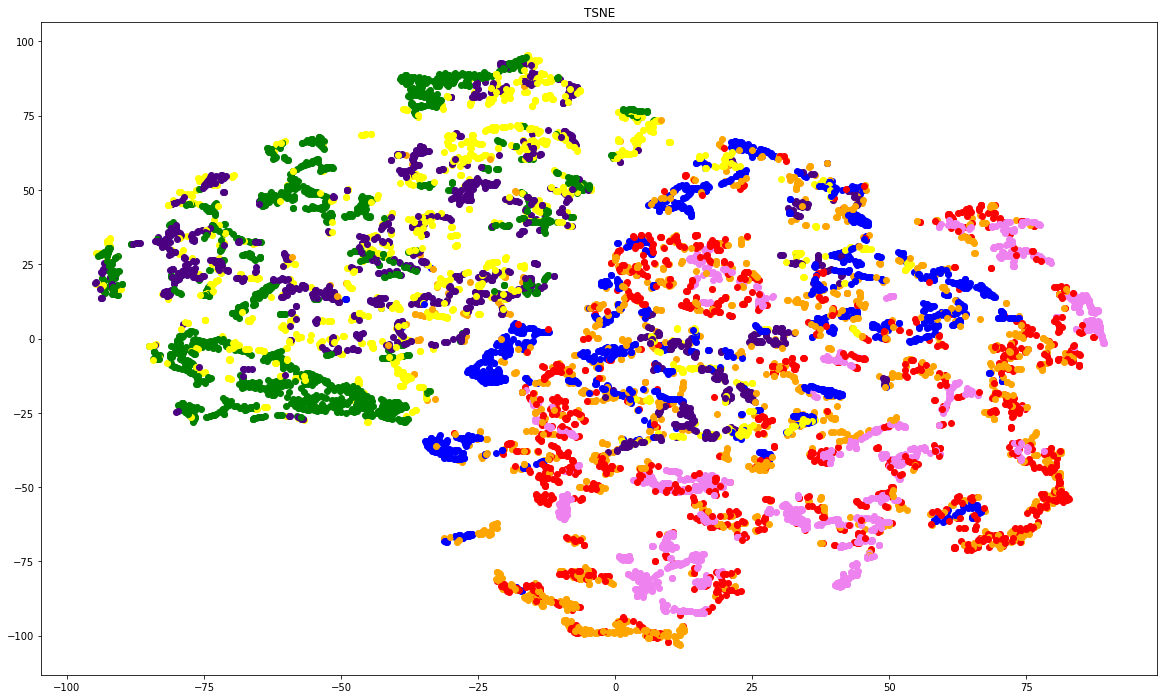

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = TSNE(n_components=2)

print('Iniciando redução de Dimensionalidade')

vis = pca.fit_transform(data.iloc[:1000, :-1], dataset.iloc[:1000, -1])

print('TSNE complete!')

data_array = np.array(dataset.iloc[:1000])

colors = {1:'red', 2: 'orange', 3: 'yellow', 4:'green', 5:'blue', 6:'indigo', 7:'violet'}

print(vis.shape[0])

for i in range(vis.shape[0]):
    print(i, end='\r')
    plt.scatter(vis[i,0], vis[i,1], c=colors[data_array[i,-1]])

print('Plot Complete')
plt.title('TSNE')
plt.show()

## Correlação das características

In [365]:
import seaborn

def plot_corr_matrix(data,annot=False):
    seaborn.heatmap(data.corr(), cmap="YlGnBu", annot=annot)
    plt.show()

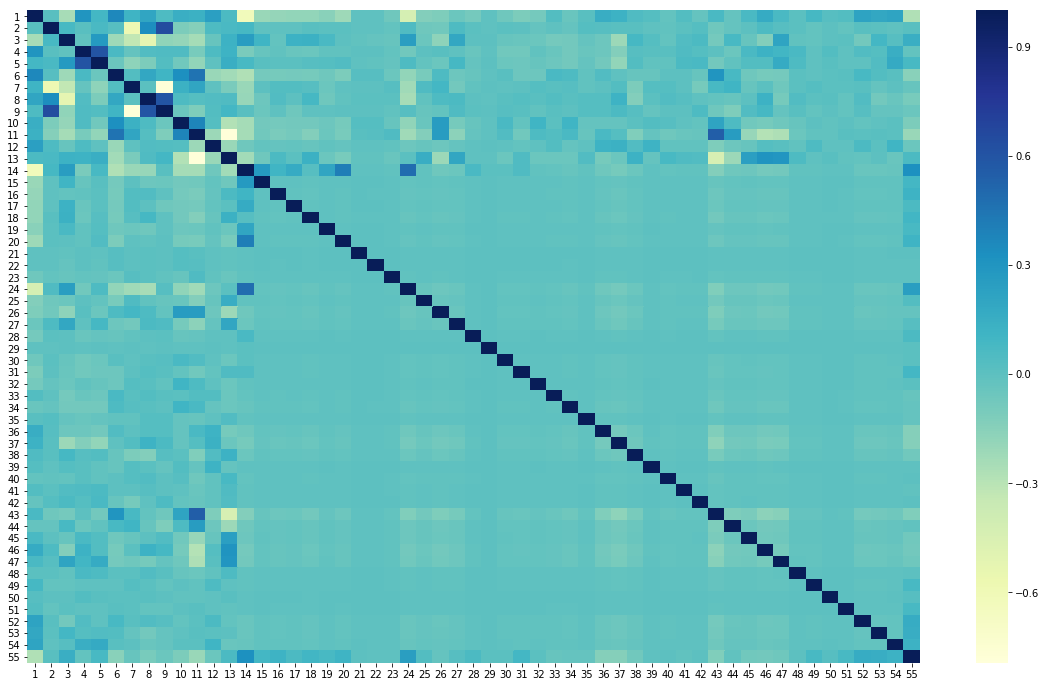

In [7]:
plot_corr_matrix(data)

In [22]:
def plot_coor_matrix(corr_matrix, headers=None, title=''):
    headers = headers or corr_matrix.columns
    plt.matshow(corr_matrix)
    plt.xticks(range(len(corr_matrix)), headers, rotation='vertical')
    plt.yticks(range(len(corr_matrix)), headers)
    clb = plt.colorbar()
    print('\t'+title)
    plt.show()

<IPython.core.display.Javascript object>


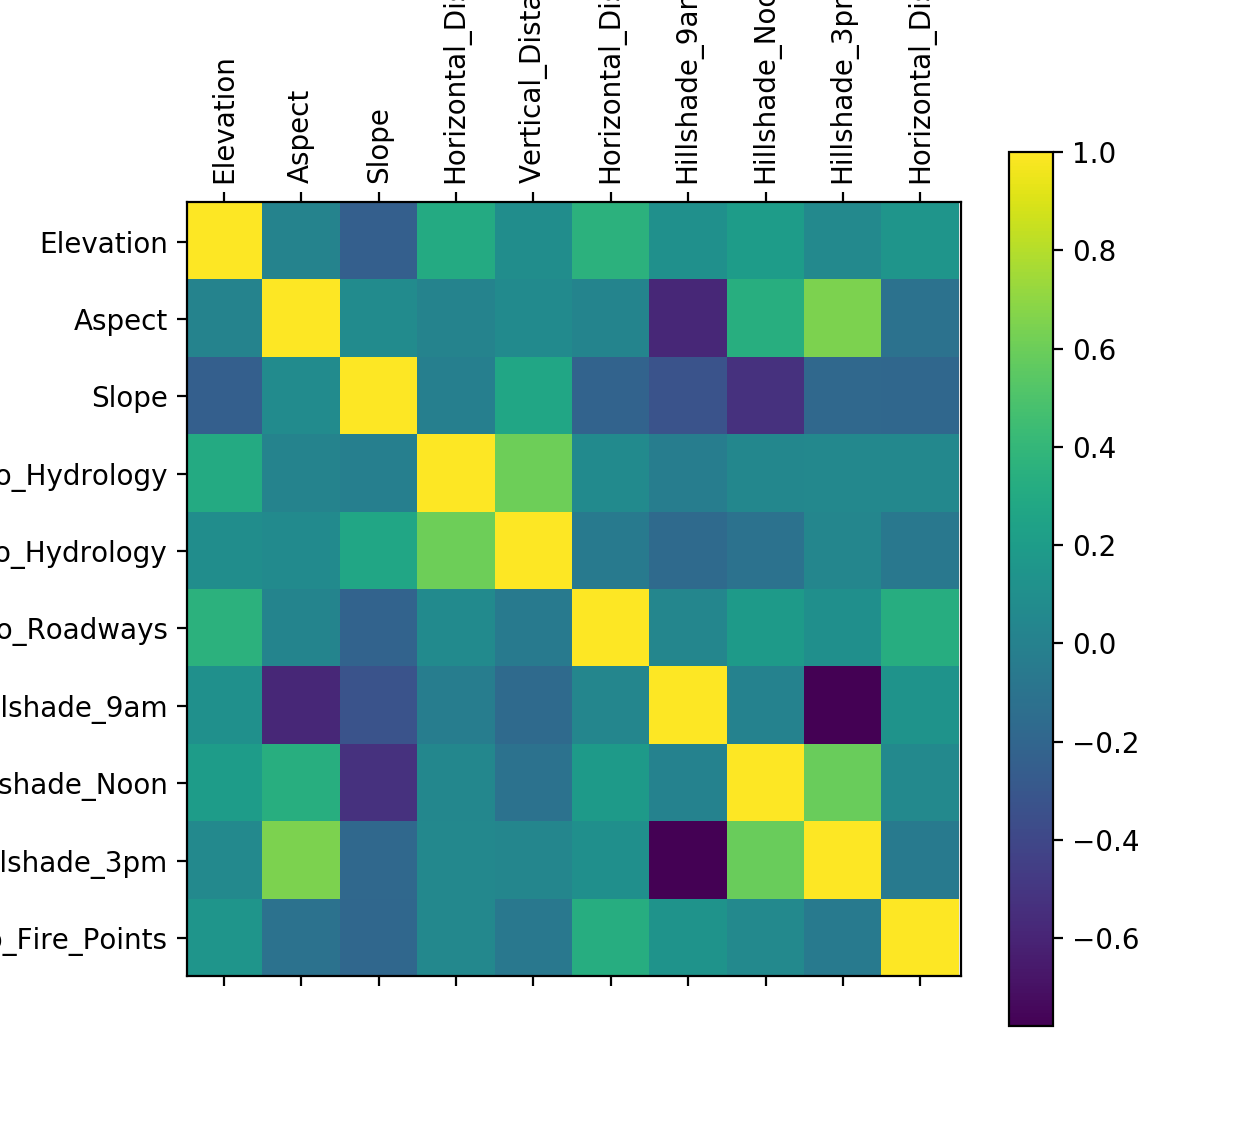

	Pearson Corr


In [25]:
matrix_corr = dataset.iloc[:, :10].corr()
headers = names
plot_coor_matrix(matrix_corr, headers, 'Pearson Corr')

In [33]:
def test_corr(matrix_corr, verbose=1):
    size = len(matrix_corr)
    reject = []
    for i in matrix_corr.columns:
        for j in matrix_corr.columns:
            if (i == j):
                continue
            x = np.fabs(matrix_corr[i][j])
            not_rejected = ((i, j) not in reject) and ((j, i) not in reject)  
            if ((x > 0.798) and not_rejected):
                reject.append((i, j))
                if (verbose > 0):
                    print('Reject either \'{0}\' or \'{1}\'.'.format(
                        i, j
                    ))
    if len(reject) < 1:
        print('No colums to reject.')
    return reject

In [34]:
reject_index = test_corr(matrix_corr)

No colums to reject.


### Resultados Parciais
Visto os resultados da avaliação por correlação, nenhuma das colunas necessita ser retirada.

## Estudo de distribução das classes

In [176]:
target_sums = [(dataset.loc[:, 'Target'] == i).sum() for i in range(1, 8)]
target_perc = [(target_sums[i] * 100) / dataset.shape[0] for i in range(len(target_sums))]
for i in range(len(target_perc)):
    print('Class {} has {}\tsamples which is\t{:.3f}%\tof the total'.format(i+1,
                                                                         target_sums[i],
                                                                         target_perc[i]
                                                                        ))

Class 1 has 211840	samples which is	36.461%	of the total
Class 2 has 283301	samples which is	48.760%	of the total
Class 3 has 35754	samples which is	6.154%	of the total
Class 4 has 2747	samples which is	0.473%	of the total
Class 5 has 9493	samples which is	1.634%	of the total
Class 6 has 17367	samples which is	2.989%	of the total
Class 7 has 20510	samples which is	3.530%	of the total


O _dataset_ necessita de uma re-distribuição, visto que a classe 4 é quase insignificante sob o todo e as classes 1 e 2 se sobressaem em quantidade.

## Estudo das caracteristicas binárias
Após a análise sobre as características quantitativas, partimos para a análise das demais caracteristicas, que representam 80% das caracteristicas.

Primeiramente, plotamos um gráfico de violino, que analisa a distribuição de cada caracteristica por classe. Sendo assim, podemos ver como uma _feature_ se apresenta dentro de uma classe e como cada uma esta distinta das demais, baseando-se em apenas uma _feature_.

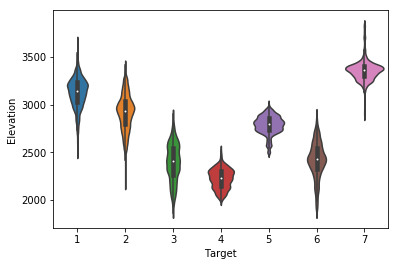

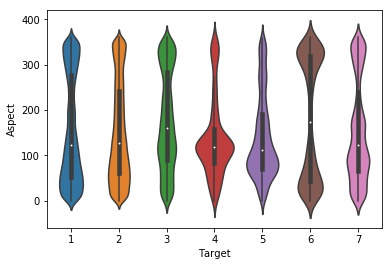

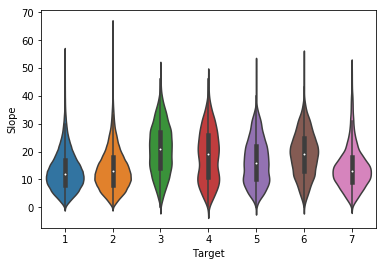

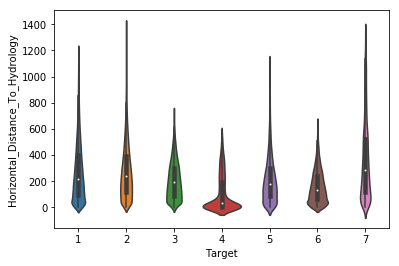

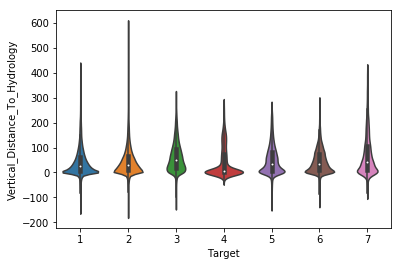

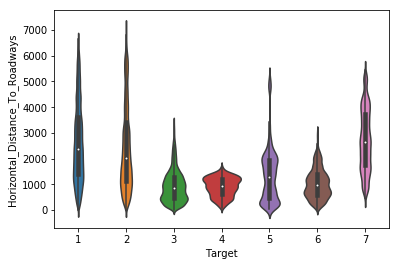

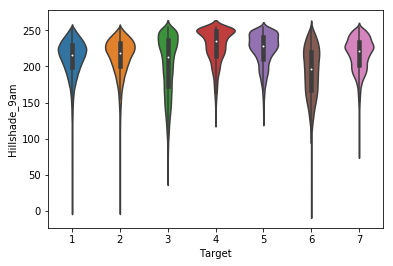

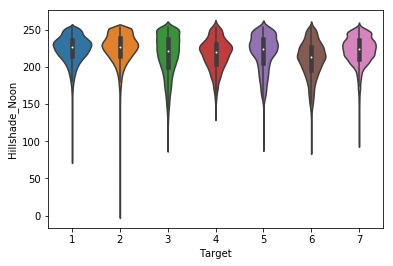

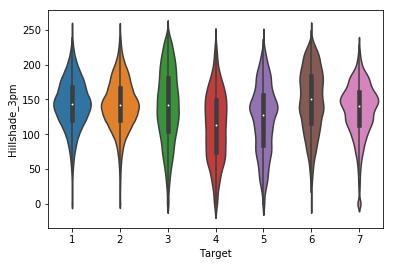

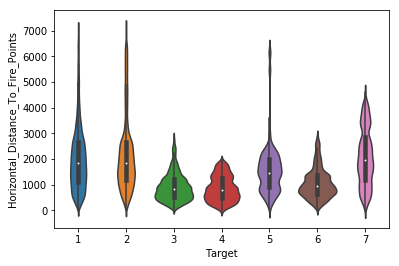

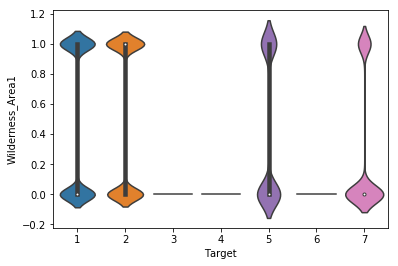

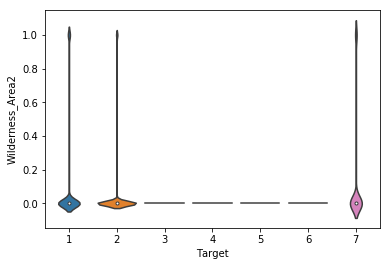

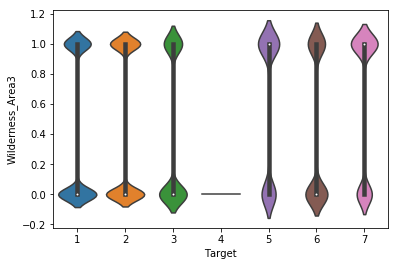

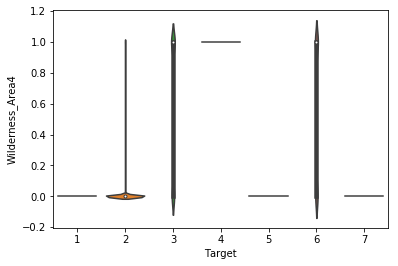

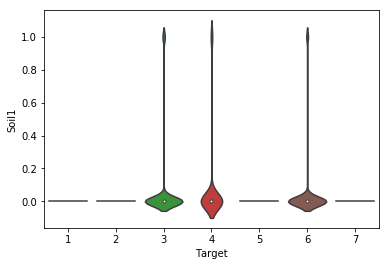

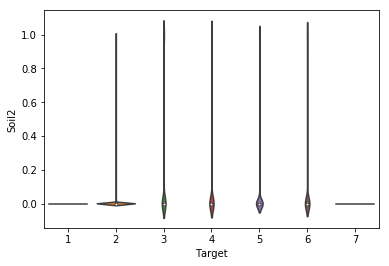

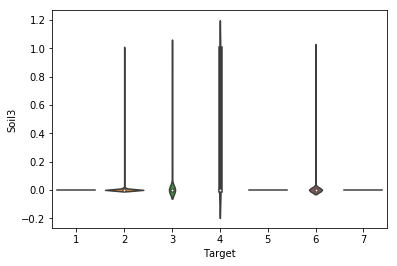

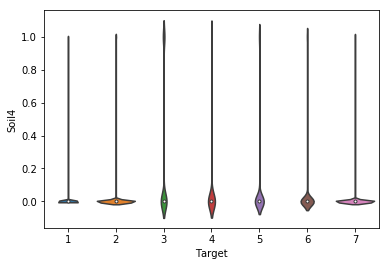

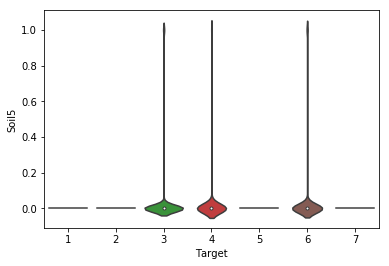

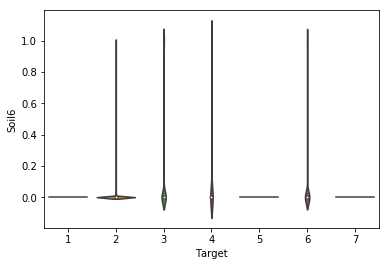

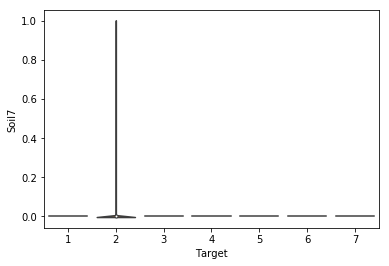

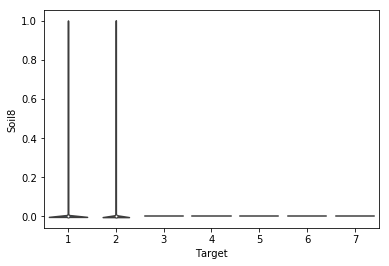

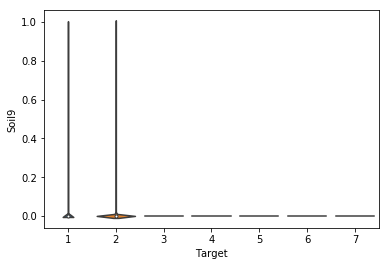

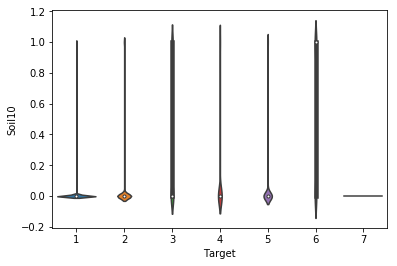

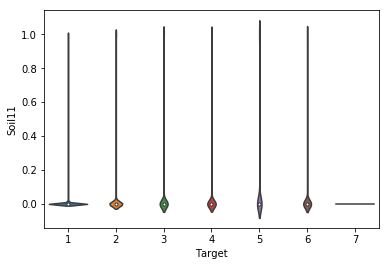

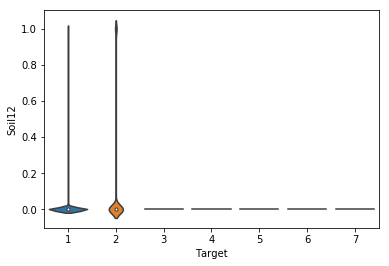

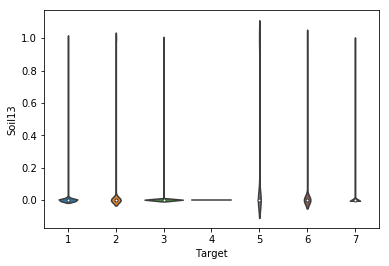

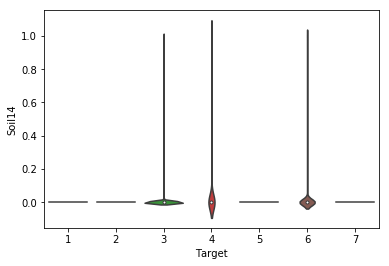

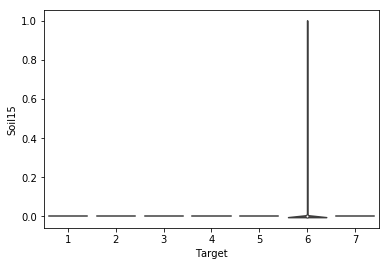

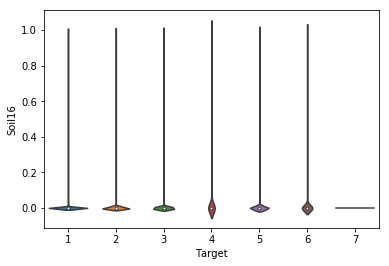

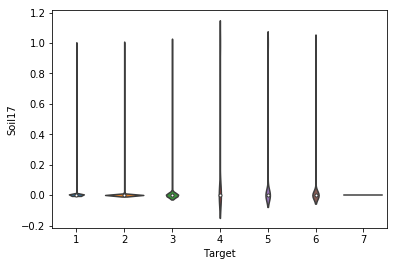

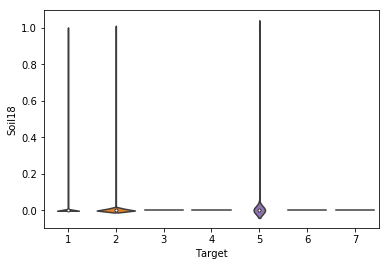

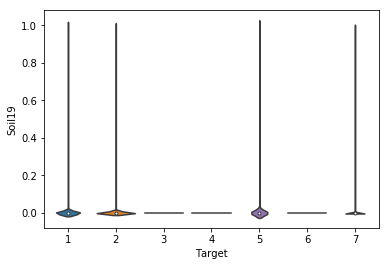

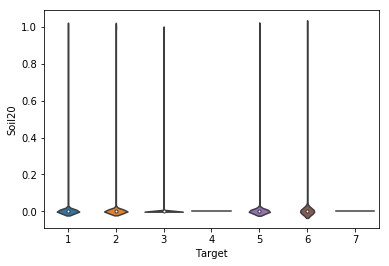

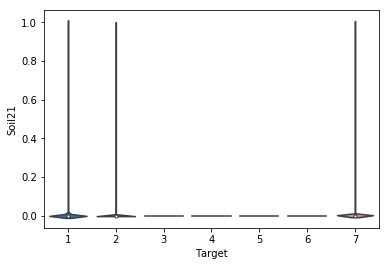

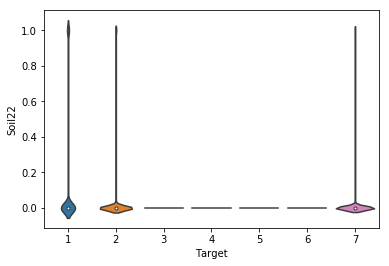

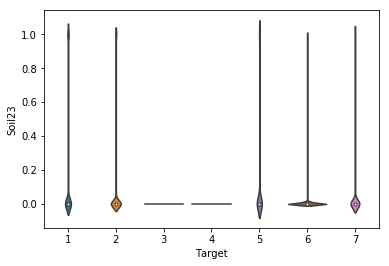

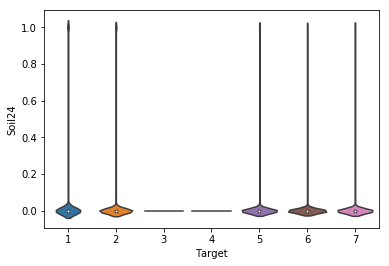

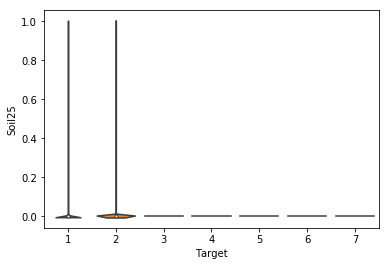

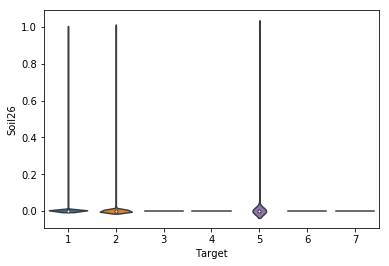

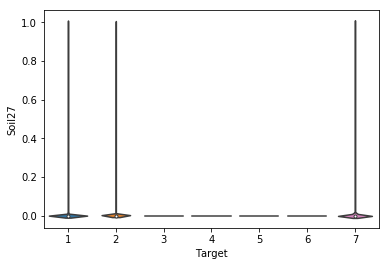

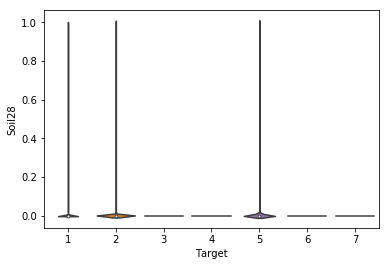

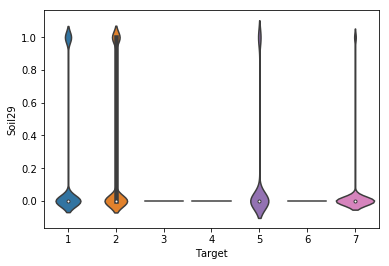

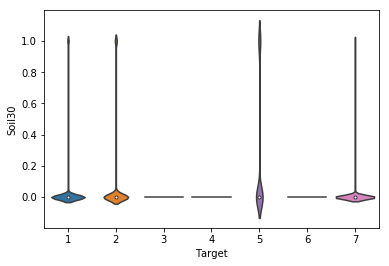

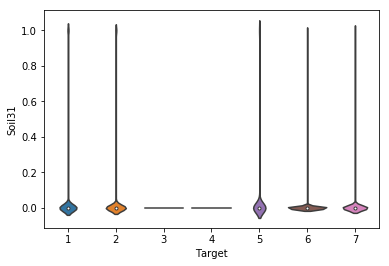

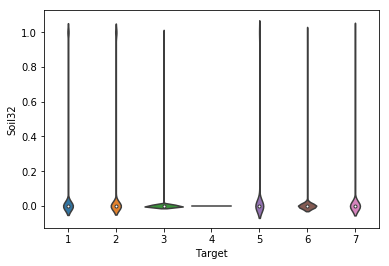

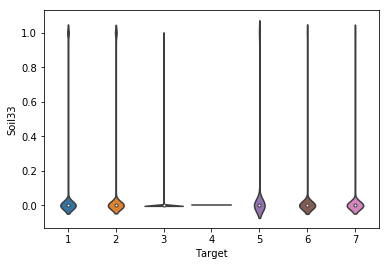

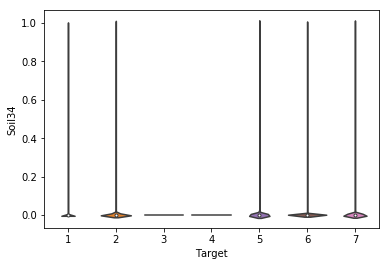

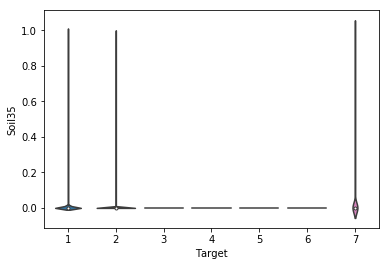

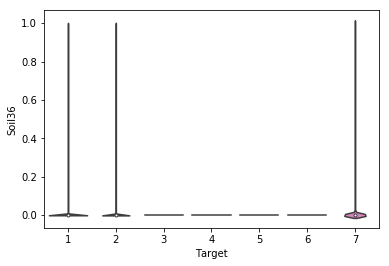

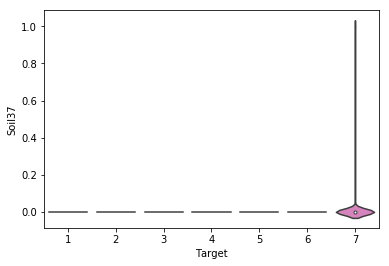

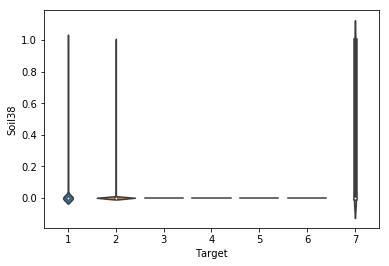

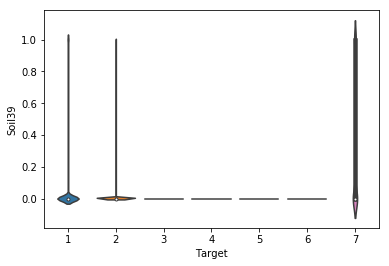

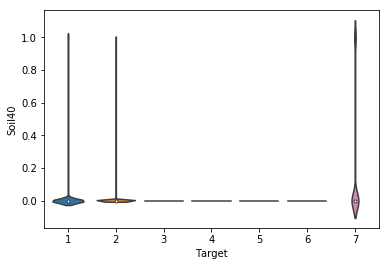

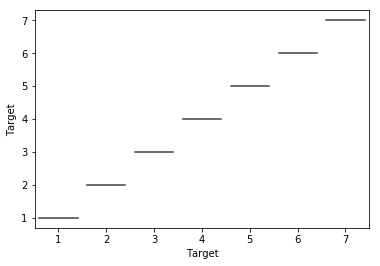

In [76]:
import seaborn as sns 
%matplotlib inline
for i in range(0, dataset.shape[1]):
    fig = sns.violinplot(data=dataset, x='Target', y=dataset.columns[i])
    plt.show()
    plt.close()

Após a análise de distribuição por meio de violinos, podemos visualizar essa mesma distribuição para caracteristicas qualitativas no formato de gráfico de barras, onde vemos a quantidade da recorrência que ocorre a aparição positiva de uma _feature_ em determinada classe.

In [158]:
def calc_binary_hit(dataset, columns):
    hit = []
    rows = [dataset[dataset['Target'] == i].index.tolist() for i in range(1,8)]

    for i, col in enumerate(columns):
        col_i = 10 + i
        h = [(dataset.iloc[row, col_i] == 1).sum() for row in rows]
        hit.append((col, h))

    return hit

In [159]:
hit = calc_binary_hit(dataset, dataset.columns[10:])
hit

[('Wilderness_Area1', [105717, 146197, 0, 0, 3781, 0, 5101]),
 ('Wilderness_Area2', [18595, 8985, 0, 0, 0, 0, 2304]),
 ('Wilderness_Area3', [87528, 125093, 14300, 0, 5712, 7626, 13105]),
 ('Wilderness_Area4', [0, 3026, 21454, 2747, 0, 9741, 0]),
 ('Soil1', [0, 0, 2101, 178, 0, 752, 0]),
 ('Soil2', [0, 852, 4991, 115, 264, 1303, 0]),
 ('Soil3', [0, 1191, 2411, 1018, 0, 203, 0]),
 ('Soil4', [182, 3251, 7501, 168, 585, 631, 78]),
 ('Soil5', [0, 0, 967, 48, 0, 582, 0]),
 ('Soil6', [0, 912, 3993, 320, 0, 1350, 0]),
 ('Soil7', [0, 105, 0, 0, 0, 0, 0]),
 ('Soil8', [43, 136, 0, 0, 0, 0, 0]),
 ('Soil9', [161, 986, 0, 0, 0, 0, 0]),
 ('Soil10', [956, 10803, 11532, 224, 260, 8859, 0]),
 ('Soil11', [747, 9077, 1353, 34, 681, 518, 0]),
 ('Soil12', [2693, 27278, 0, 0, 0, 0, 0]),
 ('Soil13', [2197, 13258, 41, 0, 1315, 614, 6]),
 ('Soil14', [0, 0, 116, 155, 0, 328, 0]),
 ('Soil15', [0, 0, 0, 0, 0, 3, 0]),
 ('Soil16', [636, 1743, 129, 51, 35, 251, 0]),
 ('Soil17', [214, 957, 506, 436, 600, 709, 0]),
 ('

In [227]:
def plot_count(hit):
    %matplotlib inline
    ind = np.arange(1,8)

    for col, hit_map in hit:
        fig, ax = plt.subplots()
        plt.bar(ind, hit_map)
        ax.set_xticks(ind)
        ax.set_title('{} distribution'.format(col))
        ax.set_xlabel('Target')
        plt.show()
        plt.close()

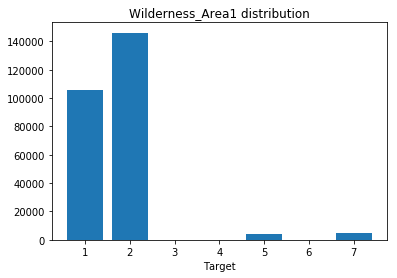

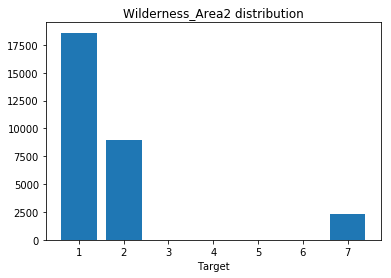

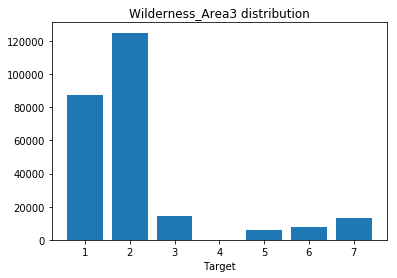

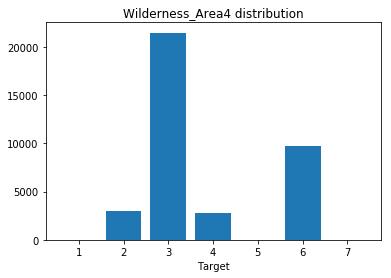

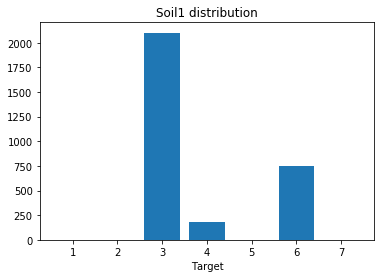

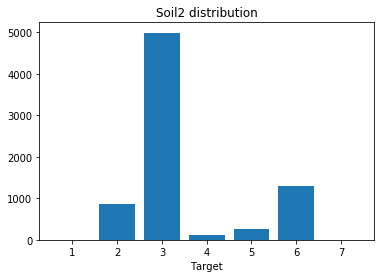

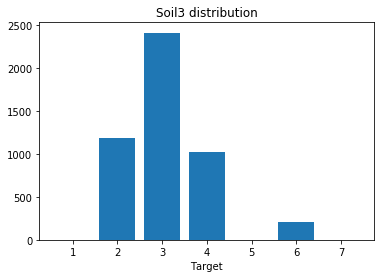

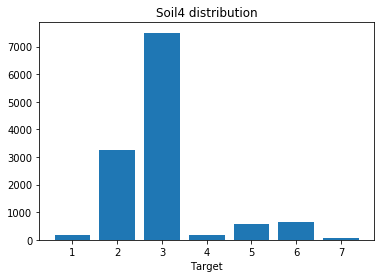

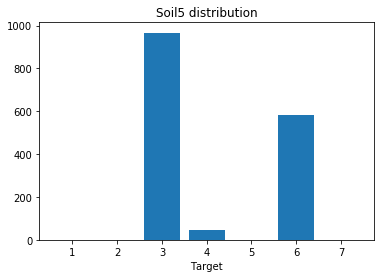

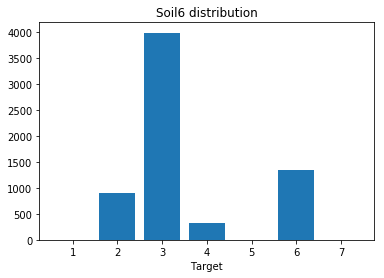

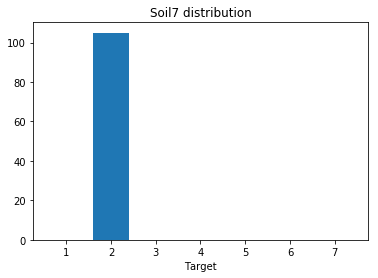

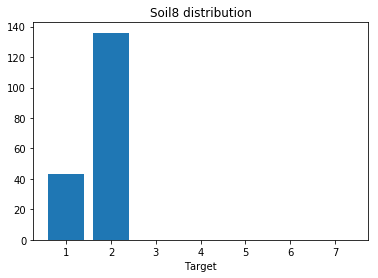

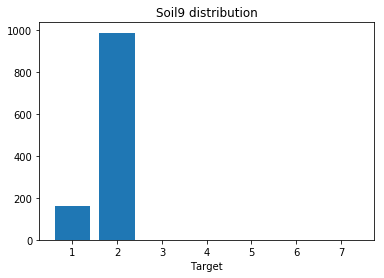

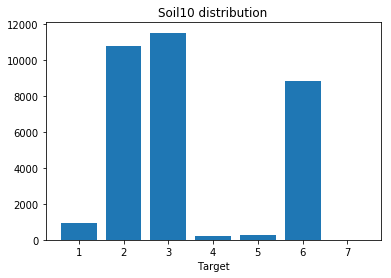

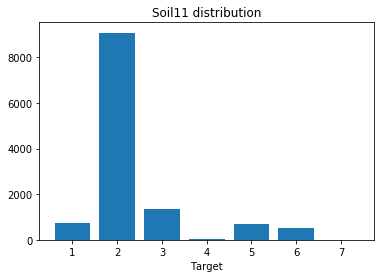

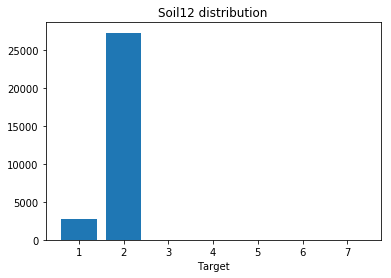

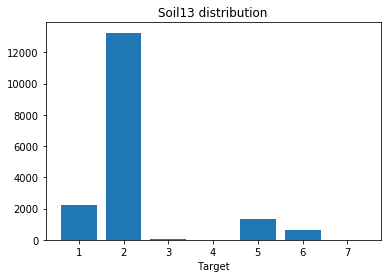

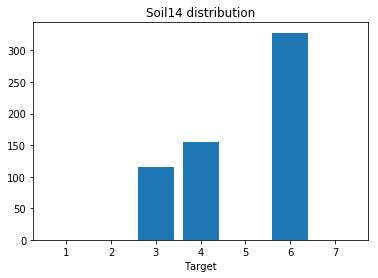

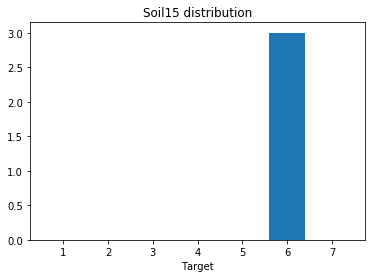

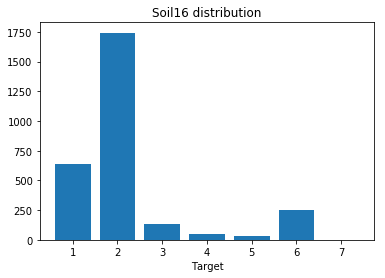

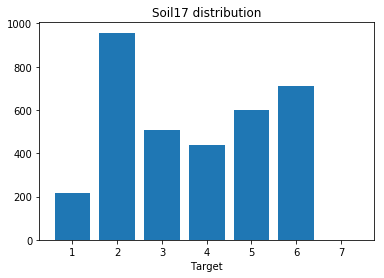

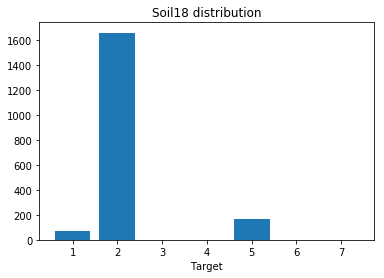

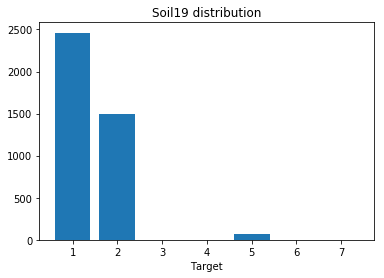

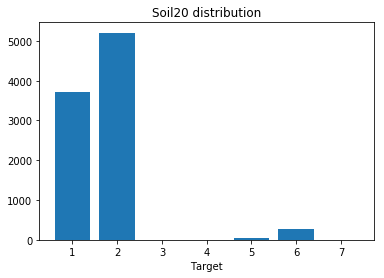

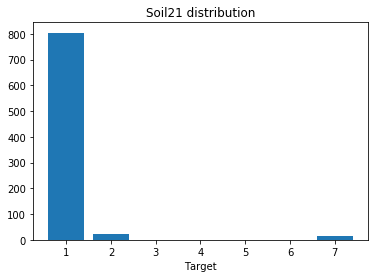

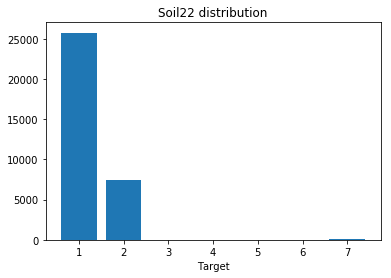

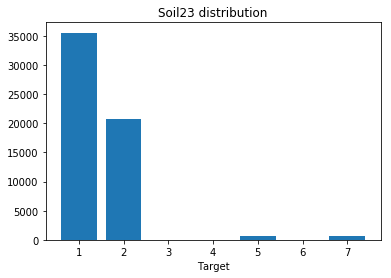

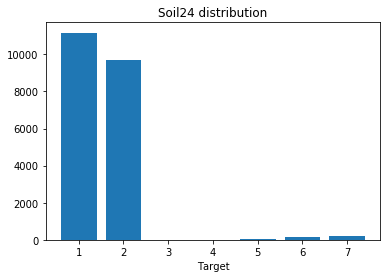

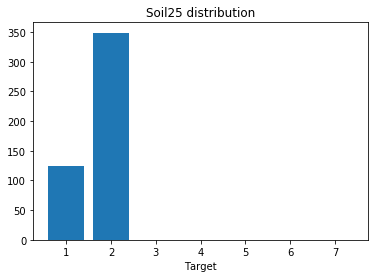

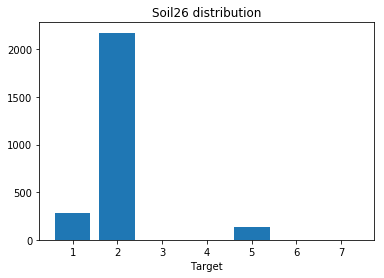

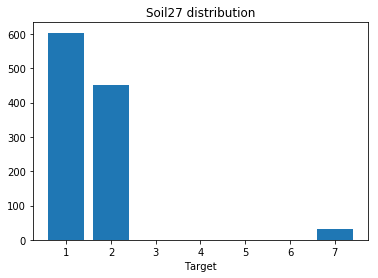

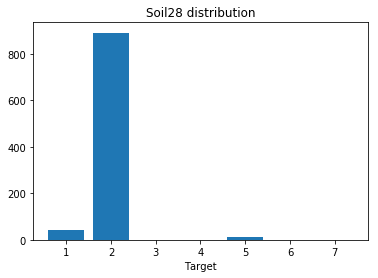

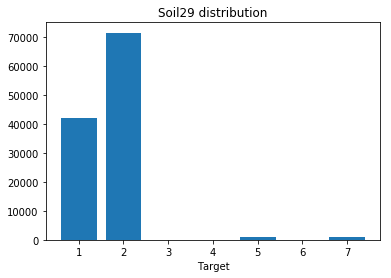

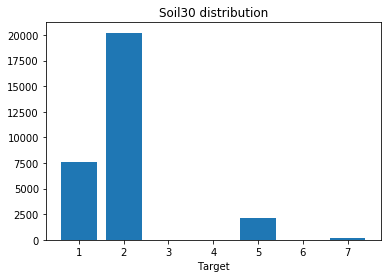

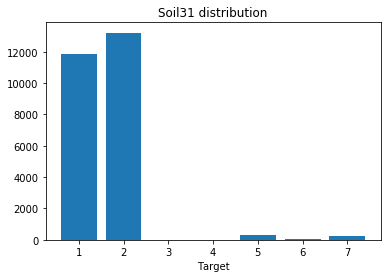

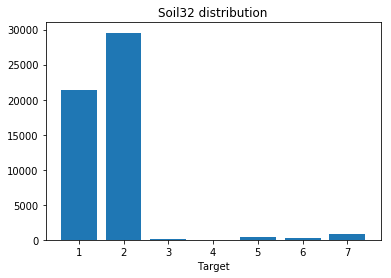

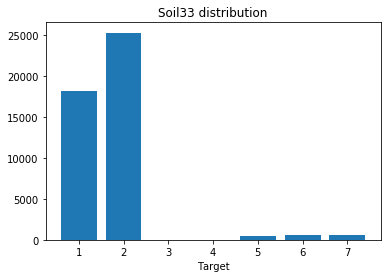

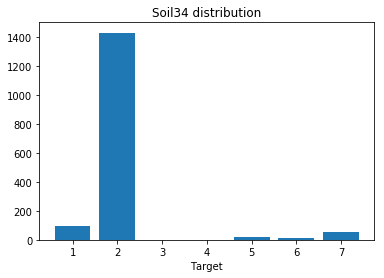

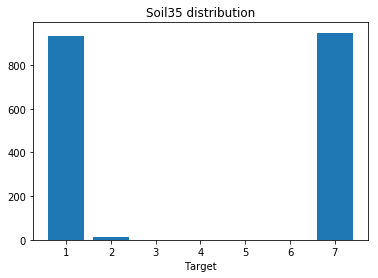

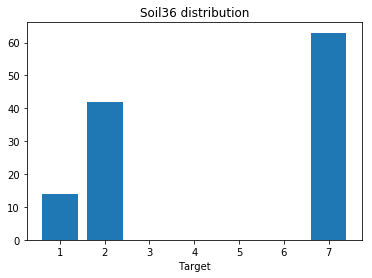

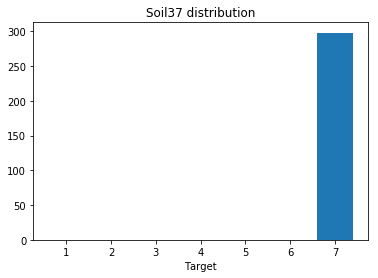

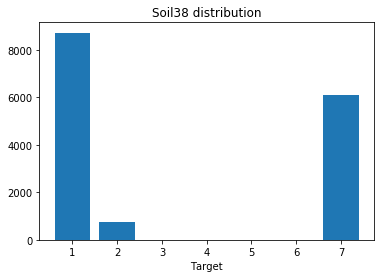

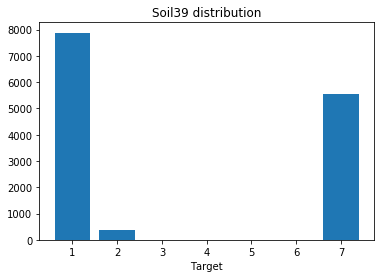

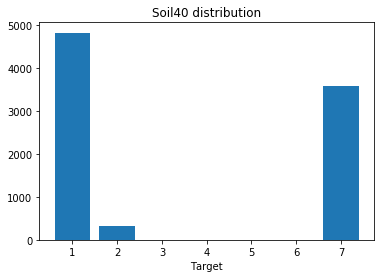

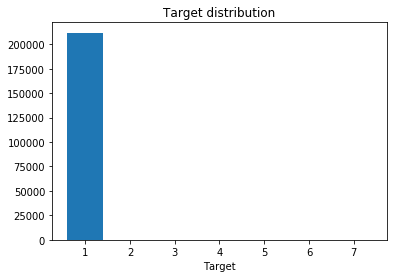

In [153]:
plot_count(hit)

### Comentários
Com isso podemos visualizar algumas coisas.
- A caracteristica 'Elevation' consegue separar bem as classes, portanto é importante;
- '_Aspect_', '_Distance to road_', '_Distance to hidro_', '_Hillshade 3pm_' já não separa tão bem as classes, já que possui uma distribuição normal de todas;
- '_Wilderness Area 3_' não nos da uma distinção entre classes;
    - As demais _Wilderness Area_ são melhores para distinção;
- '_Soil 4_' não nos da uma distinção clara;
- '_Soil 7_' aparece apenas 105 vezes para uma classe, poderia ser descartável, mas é uma boa distinção para classe 2, já que a classe 2 e 1 parecem ser muito sobrepostas;
    - Dessa forma os solos 8 e 9 podem ser mantidos pela mesma lógica;
- '_Soil 15_' é descartável, já que só existem 3 recorrencias;



## Checar se tem alguma amostra inválida
Uma boa prática é sempre checar seu conjunto de dados para amostras que possuem alguma forma de inconsistência.

In [164]:
for i in range(len(dataset)):
    qualitative_features = sum(dataset.iloc[i, 10:])
    if qualitative_features == 0:
        print('Remove index {}'.format(i))
    else:
        print('checked {}'.format(i), end='\r')
print('Finished Checking')            

Finished Checking


___
# Feature Selection

## Using Tree-Based Selection

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

select = SelectFromModel(DecisionTreeClassifier())

data_selection = select.fit_transform(dataset.iloc[:,:-1], dataset.iloc[:,-1])
data_base = pd.DataFrame(data_selection)
data_base['classe'] = dataset.iloc[:,-1]

In [15]:
data_base.describe()

,0,1,2,3,4,5,6,7,8,classe
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,2.051471
std,279.984734,111.913721,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,1.396504
min,1859.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,1.000000
50%,2996.000000,127.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,2.000000
75%,3163.000000,260.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,2.000000
max,3858.000000,360.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,7.000000


In [16]:
data_base.to_csv('ignores/feature_selection.csv')<div id="preloader"></div>

<script>
    JQuery(document).ready(function($) {

        $(window).load(function() {
            $('#preloader').fadeOut('slow', function() {
                $(this).remove();
                });
            });
        });
</script>

<style type="text/css">
    div#preloader {
        position: fixed;
        left: 0;
        top: 0;
        z-index: 999;
        width: 100%;
        overflow: visible;
        background: #fff url('http://preloaders.net/preloaders/720/Moving%20line.gif') no-repeat center center;
    }
</style><div class="floating-left">
    <form action="javascript:code_toggle()">
        <input type="submit" id="codeButton" value="Mostrar Código" class="showButton">
    </form>

    <form action="javascript:out_toggle()">
        <input type="submit" id="outButton" value="Mostrar Output" class="showButton">
    </form>
</div>
<script>
    function code_toggle() {
        if (code_shown) {
            $('div.input').hide(500);
            $('#codeButton').val('Mostrar Código')
        } else {
            $('div.input').show(500);
            $('#codeButton').val('Esconder Código')
        }
        code_shown = !code_shown
    }
    
    function out_toggle() {
        if (out_shown) {
            $('div.output_stream').hide(500);
            $('div.output_stdout').hide(500);
            $('div.output_text').hide(500);
            $('#outButton').val('Mostrar Output')
        } else {
            $('div.output_stream').show(500);
            $('div.output_stdout').show(500);
            $('div.output_text').show(500);
            $('#outButton').val('Esconder Output')
        }
        out_shown = !out_shown
    }
    
    $(document).ready(function() {
        code_shown = false;
        out_shown = false;
        $('div.input').hide();
        $('div.output_stream').hide();
        $('div.output_stdout').hide();
        $('div.output_text').hide();
    })
</script>

<style type="text/css">
    .floating-left {
        display: flex;
        flex-direction: column;
        flex-flow: column;
        flex-wrap: wrap;
        height: 100px;
        position: fixed;
        justify-content: space-between;
        left: 15px;
    }
    
    .showButton{
        border : solid 2px rgba(255, 255, 255, 0.15);
        border-radius : 15px;
        -webkit-box-shadow : 6px 6px 5px rgba(0,0,0,0.1);
        box-shadow: 4px 5px 6px 0px rgba(0, 0, 0, 0.32);
        font-size : 16px;
        background-color : #fafafa;
    }
    
    .showButton:hover{
        background-color: #ddd;
    }
    
</style>

----

# Construção de novo _dataset_
## Rebalanceando a distribuição

Visto que as classes 1 e 2 representam 85% das amostras é necessário a criação de uma nova distribuição.
Nesse teste sugerimos a nova proporção de 40% para as duas primeiras classes e a 60% para as demais classes.

Sendo os 40% divididos entre 45% para a primeira classe e 55% para a segunda, com o intuito de manter a proporção inicial.

In [196]:
def calc_percs(dataset, two_perc=.60):
    target_sums = [(dataset.loc[:, 'Target'] == i).sum() for i in range(1, 8)]
    new_perc = sum(target_sums[2:])
    hundred = int(new_perc/two_perc)
    first_class = int(hundred*(1-two_perc)*0.45)
    second_class = int(hundred*(1-two_perc)*0.55)
    
    return (first_class, second_class)

In [216]:
from random import sample
first_class_count, second_class_count = calc_percs(dataset)

first_indexes = dataset[dataset['Target'] == 1].index.tolist()
second_indexes = dataset[dataset['Target'] == 2].index.tolist()

target_1_drop = sample(first_indexes, len(first_indexes)-first_class_count)
target_2_drop = sample(second_indexes, len(second_indexes)-second_class_count)

In [217]:
new_dt = dataset.copy()
new_dt = new_dt.drop(target_1_drop+target_2_drop, axis=0)
new_dt = new_dt.reset_index(drop=True)
new_dt.shape

(143117, 55)

In [311]:
[(new_dt.loc[:, 'Target'] == i).sum() for i in range(1, 8)]

[25761, 31485, 35754, 2747, 9493, 17367, 20510]

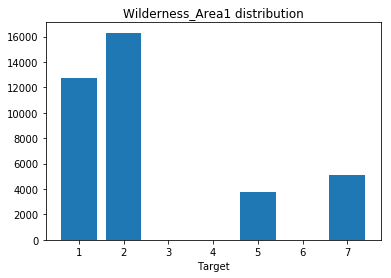

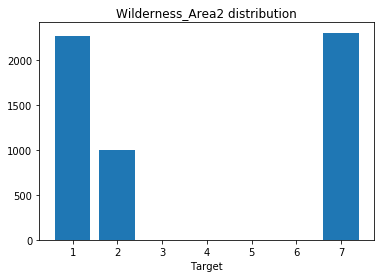

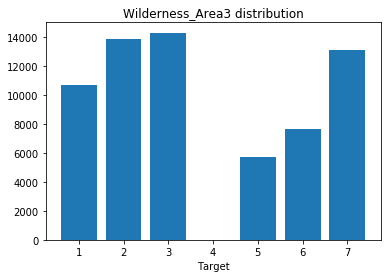

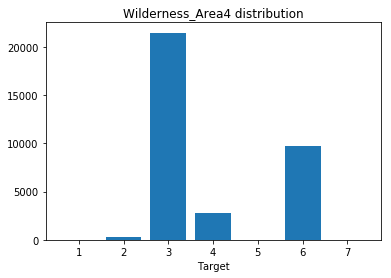

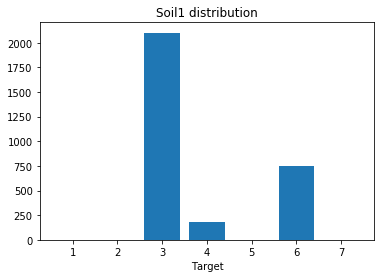

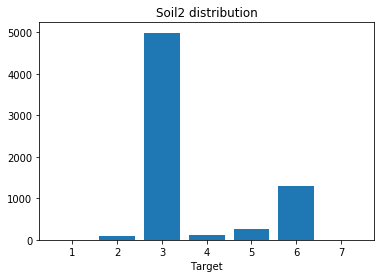

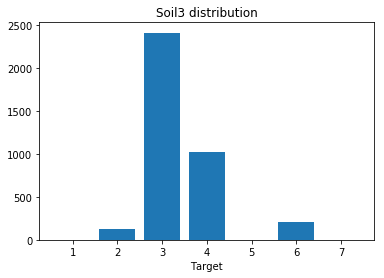

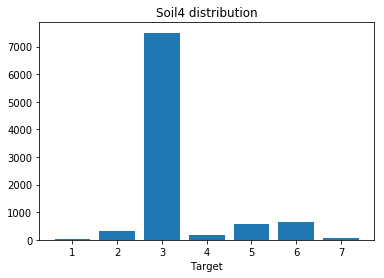

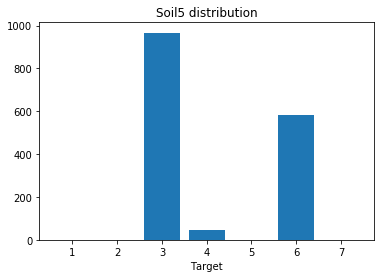

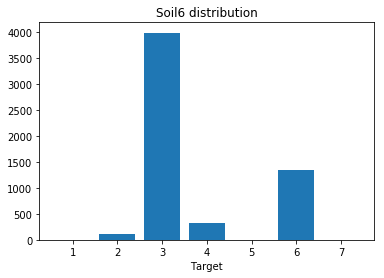

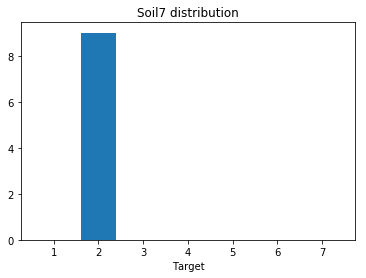

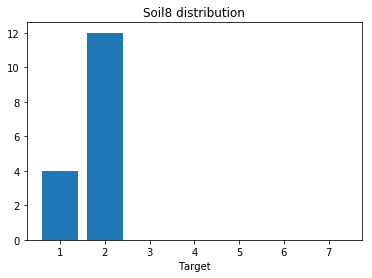

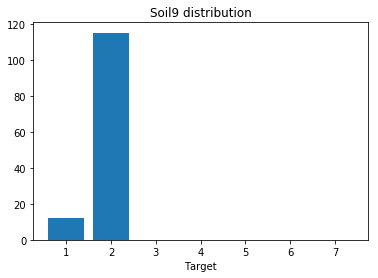

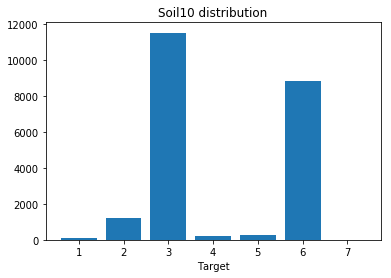

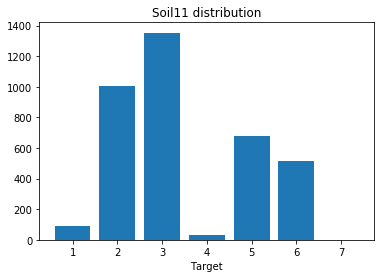

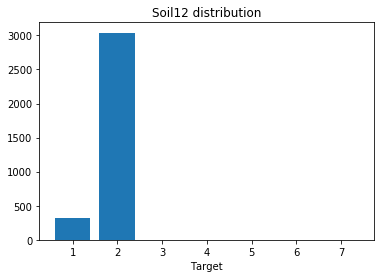

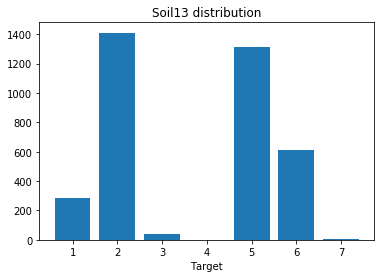

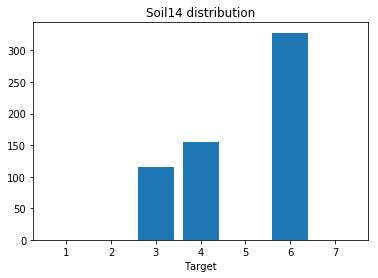

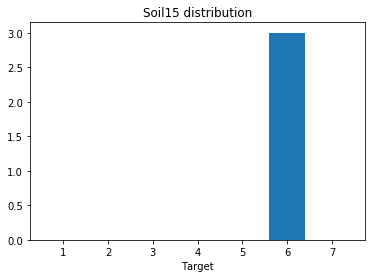

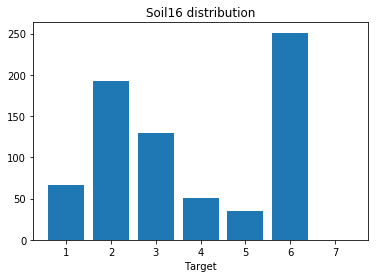

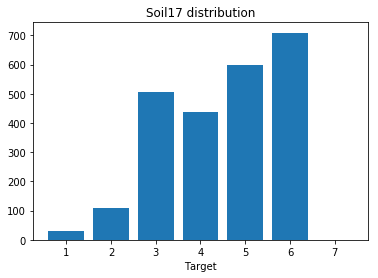

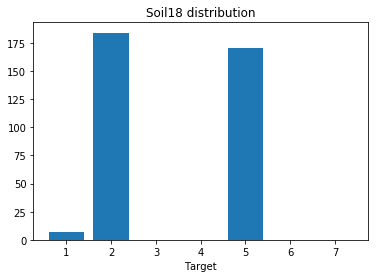

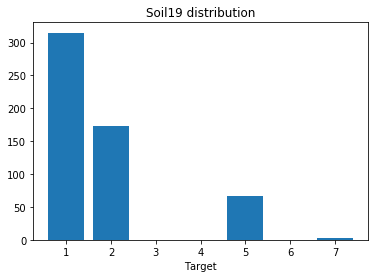

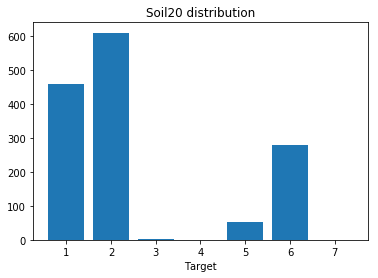

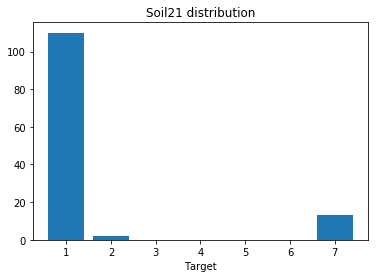

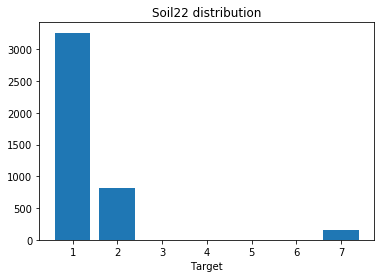

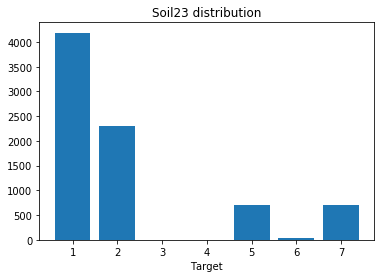

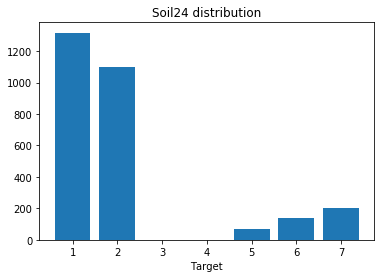

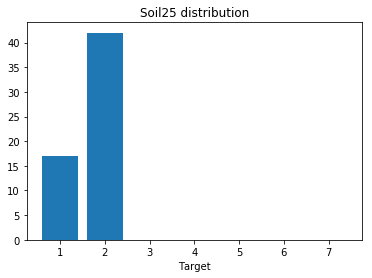

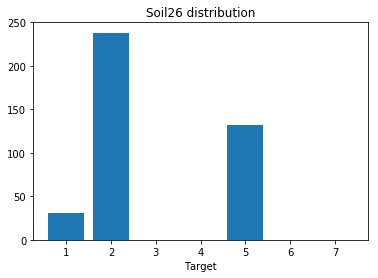

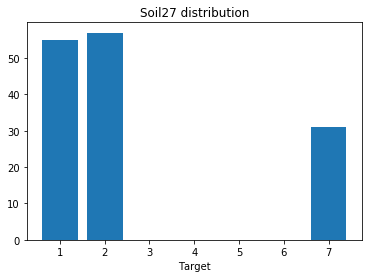

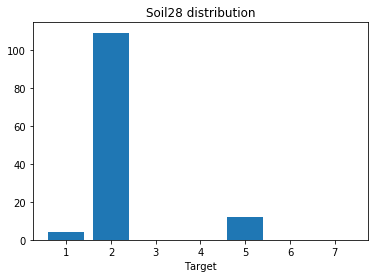

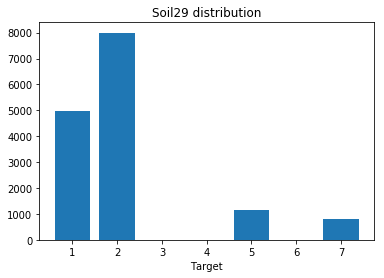

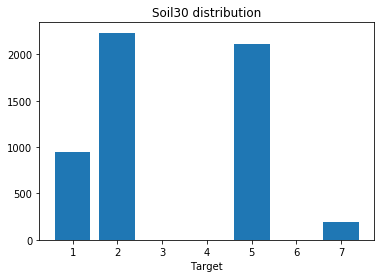

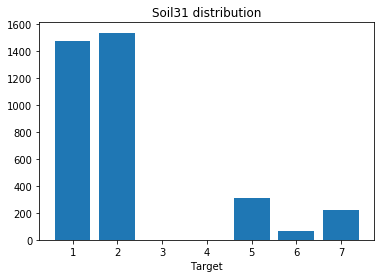

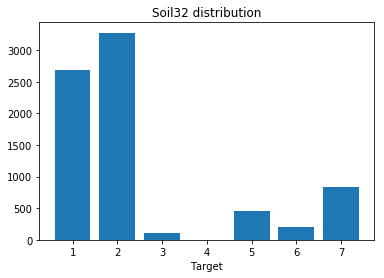

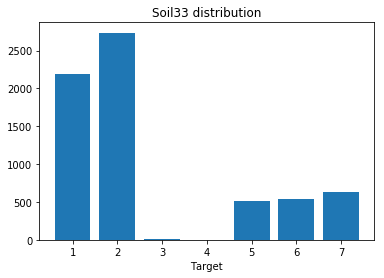

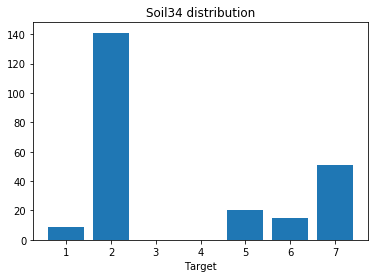

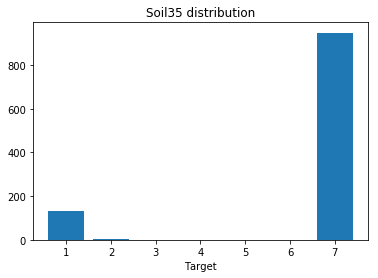

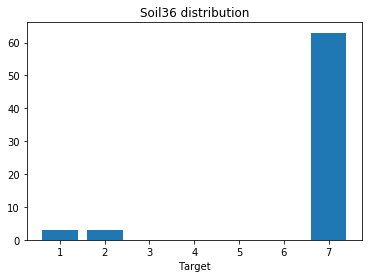

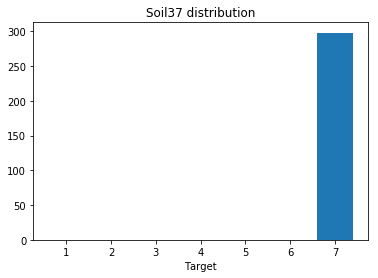

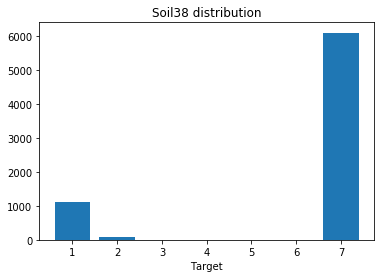

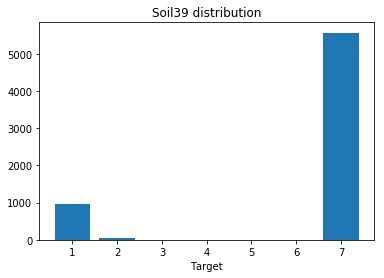

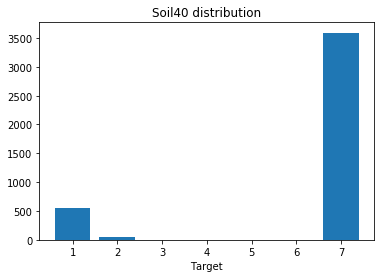

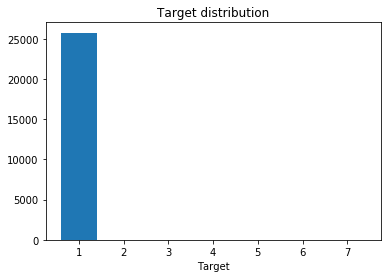

In [228]:
new_hit = calc_binary_hit(new_dt, new_dt.columns[10:])
plot_count(new_hit)

### Resultados
Visto que as colunas '_Soil7_','_Soil8_' e '_Soil15_' não possuem dados significativos para quaisquer classe, tais caracteristicas podem ser descartadas.

In [231]:
new_dt = new_dt.drop(['Soil7','Soil8','Soil15'], axis=1)

## Normalizando valores quantitativos 
Para as caracteristicas quatitativas, é uma boa prática realizar a normalização desses dados para que não existe uma discrepância muito grande de valores entre as amostras, dando assim importâncias e pesos muito diferentes para valores distantes.

In [334]:
from sklearn.preprocessing import StandardScaler

y = new_dt.loc[:, 'Target'].values
X = new_dt.iloc[:, :-1].values

ssc = StandardScaler()
X = ssc.fit_transform(X[:, 0:10])
X = np.concatenate((X, new_dt.iloc[:, 10:-1].values), axis=1)

/Users/DaniloBarros/.virtualenvs/3metodos/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Após a escala das caracteristicas quantitativas, devemos salvar o modelo para utilizarmos posteriormente em classificações de amostras que não estejam em conformidade com a escala criada.

In [356]:
from sklearn.externals import joblib
joblib.dump(ssc, 'stdscaler.pkl')

['stdscaler.pkl']

Após a normalização é feita a junção das caracteristicas quantitativas com as qualitativas. Ao final podemos randomizar a distribuição das amostras para assegurar a distribuição igual das amostras.

In [325]:
from random import shuffle
std_dataset = np.concatenate((X, y.reshape(y.shape[0],1)), axis=1)
shuffle(std_dataset)
std_dataset.shape

(143117, 52)

Ao final salvamos os conjuntos de dados em arquivos para futuro treinamento.

In [330]:
new_dt.to_csv('143k.csv', index=False)
new_dt_std = pd.DataFrame(data=std_dataset, columns=new_dt.columns)
new_dt_std.to_csv('143k_std.csv', index=False)

# Save dropped samples to future evaluation
dataset.iloc[target_1_drop+target_2_drop, :].to_csv('143k_val.csv', index=False)

### Criação de demais conjuntos de dados com diferentes distribuições

Para maiores testes foram criados novos conjuntos de dados que alteram apenas a distribuição das primeiras duas classes dentro do montante de amostras.

In [354]:
def pre_process(dataset, ssc, perc):
    new_dt = dataset.copy()
    val_dt = None
    
    if perc < 80:
        first_class_count, second_class_count = calc_percs(dataset, perc)

        first_indexes = dataset[dataset['Target'] == 1].index.tolist()
        second_indexes = dataset[dataset['Target'] == 2].index.tolist()

        target_1_drop = sample(first_indexes, len(first_indexes)-first_class_count)
        target_2_drop = sample(second_indexes, len(second_indexes)-second_class_count)
    
        new_dt = new_dt.drop(target_1_drop+target_2_drop, axis=0)
        new_dt = new_dt.reset_index(drop=True)
        
        val_dt = dataset.iloc[target_1_drop+target_2_drop, :]

    new_dt = new_dt.drop(['Soil7','Soil8','Soil15'], axis=1)
    
    y = new_dt.loc[:, 'Target'].values
    X = new_dt.iloc[:, :-1].values
    X = ssc.transform(X[:, 0:10])
    X = np.concatenate((X, new_dt.iloc[:, 10:-1].values), axis=1)
    X = np.concatenate((X, y.reshape(y.shape[0],1)), axis=1)
    
    new_dt = pd.DataFrame(data=X, columns=new_dt.columns)

    
    return (new_dt, val_dt)

In [350]:
new_dataset, validation_dataset = pre_process(dataset, ssc, 0.50)
new_dataset.to_csv('50-50_std.csv', index=False)
validation_dataset.to_csv('50-50_val.csv', index=False)

/Users/DaniloBarros/.virtualenvs/3metodos/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [351]:
new_dataset, validation_dataset = pre_process(dataset, ssc, 0.40)
new_dataset.to_csv('60-40_std.csv', index=False)
validation_dataset.to_csv('60-40_val.csv', index=False)

/Users/DaniloBarros/.virtualenvs/3metodos/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [352]:
new_dataset, validation_dataset = pre_process(dataset, ssc, 0.30)
new_dataset.to_csv('70-30_std.csv', index=False)
validation_dataset.to_csv('70-30_val.csv', index=False)

/Users/DaniloBarros/.virtualenvs/3metodos/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [355]:
new_dataset, validation_dataset = pre_process(dataset, ssc, 0.90)
new_dataset.to_csv('All_std.csv', index=False)

/Users/DaniloBarros/.virtualenvs/3metodos/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
